In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class RBFN():
    def __init__(
        self,
        input_shape,
        hidden_shape,
        sigma=1.0,
    ):
        self.input_shape = input_shape
        self.hidden_shape = hidden_shape
        self.sigma = sigma
        self.centers = None
        self.weights = None
        
    def __kerner_func(
        self,
        center,
        data_point,
    ):
        return np.exp(
            -self.sigma*np.linalg.norm(center - data_point)**2
        )

    def __calc_interpolation(self, X):
        G = np.zeros((X.shape[0], self.hidden_shape))
        for data_point_arg, data_point in enumerate(X):
            for center_arg, center in enumerate(self.centers):
                G[data_point_arg, center_arg] = self.__kerner_func(
                                                    center,
                                                    data_point,
                                                )   
        return G
    
    def fit(self, X, Y):
        rnd_args = np.random.permutation(X.shape[0]).tolist()
        self.centers = [X[arg] for arg in rnd_args][:self.hidden_shape]
        G = self.__calc_interpolation(X)
        self.weights = np.dot(np.linalg.pinv(G), Y)
        
    def predict(self, X):
        G = self.__calc_interpolation(X)
        preds = np.dot(G, self.weights)
        return preds

In [10]:
x = np.linspace(0, 10, 100)
y = np.sin(x)

model = RBFN(1, hidden_shape=10)
model.fit(x, y)

preds = model.predict(x)

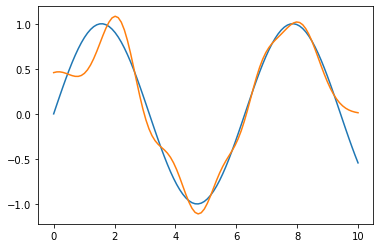

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y)
ax.plot(x, preds)

In [12]:
def f (x):
    return np.exp(x*0.25)*np.sin(x)*np.cos(x*0.5)

In [13]:
x = np.linspace(0, 10, 100)
y = f(x)

model = RBFN(1, hidden_shape=10)
model.fit(x, y)

preds = model.predict(x)

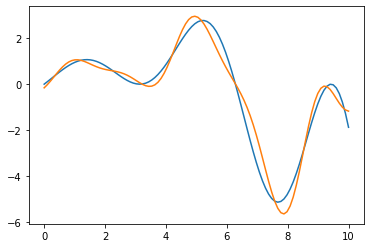

In [14]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(x, y)
ax.plot(x, preds)